# SCRIPT (D)

## Bibliotecas usadas:

In [1]:
#Importação das bibliotecas utilizadas 
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from xgboost import plot_importance

from sklearn.feature_selection import RFE

import shap
shap.initjs()

from sklearn.datasets import make_classification
from shap import TreeExplainer
from shap import summary_plot

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Endereço onde serão buscados os arquivos.
input_files = Path('C:/Users/rapha/Documents/Python_Scripts/TCC/Dados_RFB')

# DADOS DAS TRANSAÇÕES DE VENDAS DE CADA CLIENTE

## O conjuntos de dados inclui informações sobre:

Cada registro representa um resumo das transação de venda de um respectivo cliente.

 
 0. identificador_matriz_filial: Identificador se o cliente é uma matriz ou uma filial;
 1. opcao_pelo_simples: Indicador da existência da opção pelo SIMPLES;
 2. opcao_mei: Indicador da existência da opção pelo MEI;
 3. faturam_cancel: Quantidades de compras canceladas para dado cliente;
 4. faturam_concluid: Quantidades de compras concluidas para dado cliente;
 5. ST1: Indicador de atendimento pelo Setor de Atendimento (ST) 1;
 6. ST2: Indicador de atendimento pelo Setor de Atendimento (ST) 2;
 7. ST3:Indicador de atendimento pelo Setor de Atendimento (ST) 3;
 8. ST4:Indicador de atendimento pelo Setor de Atendimento (ST) 4;
 9. ST5:Indicador de atendimento pelo Setor de Atendimento (ST) 5;
 10. ST6:Indicador de atendimento pelo Setor de Atendimento (ST) 6;
 11. ST7:Indicador de atendimento pelo Setor de Atendimento (ST) 7;
 12. Qtd: Quantidade média de produtos negociações para dado cliente;                         
 13. valor_comprado: Valor média faturado em negociações para dado cliente;               
 14. Interv_Transacao: Média de dias entre cada transação para dado cliente;            
 15. duracao_transacao: Intervalo médio em dias da duração das transações para dado cliente;       
 16. evasao: Clientes que evadiram;                      
 17. tempo_existencia: Tem de existência da empresa segundo dados da RFB.

In [3]:
# Leitura da base de cientes
#Selecionando apenas as colunas que serão utilizadas no projeto.

enriquecimento = pd.read_csv(filepath_or_buffer = (str(Path(f'{input_files}' + '/' + 'enriquecimento.csv'))),
                             sep = ';',
                             engine = 'python',
                             encoding = 'utf-8',
                             usecols = [5,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,30,31])
                       
enriquecimento.head()

,identificador_matriz_filial,opcao_pelo_simples,opcao_mei,faturam_cancel,faturam_concluid,ST1,ST2,ST3,ST4,ST5,ST6,ST7,Qtd,valor_comprado,Interv_Transacao,duracao_transacao,evasao,tempo_existencia
0,1,0,0,1,13,1,1,4,1,3,4,0,39.071429,1278.350000,73,1.928571,0,22
1,1,0,0,3,20,4,2,2,5,3,5,2,30.695652,877.456522,39,1.782609,1,22
2,1,1,0,2,18,3,2,5,0,1,6,3,32.650000,1367.650000,49,1.700000,1,37
3,1,0,0,0,9,3,1,1,0,1,2,1,17.888889,744.633333,84,0.777778,1,17
4,0,0,0,3,13,6,3,2,1,1,3,0,37.250000,1411.812500,66,1.687500,0,23


In [4]:
enriquecimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   identificador_matriz_filial  2609 non-null   int64  
 1   opcao_pelo_simples           2609 non-null   int64  
 2   opcao_mei                    2609 non-null   int64  
 3   faturam_cancel               2609 non-null   int64  
 4   faturam_concluid             2609 non-null   int64  
 5   ST1                          2609 non-null   int64  
 6   ST2                          2609 non-null   int64  
 7   ST3                          2609 non-null   int64  
 8   ST4                          2609 non-null   int64  
 9   ST5                          2609 non-null   int64  
 10  ST6                          2609 non-null   int64  
 11  ST7                          2609 non-null   int64  
 12  Qtd                          2609 non-null   float64
 13  valor_comprado    

In [5]:
enriquecimento.columns
#ou
#list(enriquecimento.columns)

Index(['identificador_matriz_filial', 'opcao_pelo_simples', 'opcao_mei',
       'faturam_cancel', 'faturam_concluid', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5',
       'ST6', 'ST7', 'Qtd', 'valor_comprado', 'Interv_Transacao',
       'duracao_transacao', 'evasao', 'tempo_existencia'],
      dtype='object')

In [6]:
#Transformação dos tipos de dados. Como não há variáveis categóricas a única manipulação será transformar o dado para o tipo inteiro.
#Repare que há uma redução quase pela metade no uso da memória.
enriquecimento_clean = enriquecimento.copy(deep=True)
enriquecimento_clean['identificador_matriz_filial'] = enriquecimento_clean['identificador_matriz_filial'].astype(int)
enriquecimento_clean['opcao_pelo_simples'] = enriquecimento_clean['opcao_pelo_simples'].astype(int)
enriquecimento_clean['opcao_mei'] = enriquecimento_clean['opcao_mei'].astype(int)
enriquecimento_clean['ST1'] = enriquecimento_clean['ST1'].astype(int)
enriquecimento_clean['ST2'] = enriquecimento_clean['ST2'].astype(int)
enriquecimento_clean['ST3'] = enriquecimento_clean['ST3'].astype(int)
enriquecimento_clean['ST4'] = enriquecimento_clean['ST4'].astype(int)
enriquecimento_clean['ST5'] = enriquecimento_clean['ST5'].astype(int)
enriquecimento_clean['ST6'] = enriquecimento_clean['ST6'].astype(int)
enriquecimento_clean['ST7'] = enriquecimento_clean['ST7'].astype(int)
enriquecimento_clean['faturam_cancel'] = enriquecimento_clean['faturam_cancel'].astype(int)
enriquecimento_clean['faturam_concluid'] = enriquecimento_clean['faturam_concluid'].astype(int)
enriquecimento_clean['Interv_Transacao'] = enriquecimento_clean['Interv_Transacao'].astype(int)
enriquecimento_clean['evasao'] = enriquecimento_clean['evasao'].astype(int)
enriquecimento_clean['tempo_existencia'] = enriquecimento_clean['tempo_existencia'].astype(int)


In [7]:
#Checagem de valores faltantes:
enriquecimento_clean.isnull().sum()

identificador_matriz_filial    0
opcao_pelo_simples             0
opcao_mei                      0
faturam_cancel                 0
faturam_concluid               0
ST1                            0
ST2                            0
ST3                            0
ST4                            0
ST5                            0
ST6                            0
ST7                            0
Qtd                            0
valor_comprado                 0
Interv_Transacao               0
duracao_transacao              0
evasao                         0
tempo_existencia               0
dtype: int64

In [8]:
#Observamos desvios padrão grandes; Média e mediana diferente acusando que a distribuição não é normal; e necessidade de reescala. 
enriquecimento_clean.describe()

,identificador_matriz_filial,opcao_pelo_simples,opcao_mei,faturam_cancel,faturam_concluid,ST1,ST2,ST3,ST4,ST5,ST6,ST7,Qtd,valor_comprado,Interv_Transacao,duracao_transacao,evasao,tempo_existencia
count,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000
mean,0.865082,0.405519,0.034496,1.417018,15.866232,3.069759,3.093522,3.119969,0.645458,2.448831,3.660406,1.245305,33.992476,1261.969051,59.281334,1.811052,0.340360,9.095822
std,0.341701,0.491086,0.182534,1.077923,3.873692,1.772673,1.772444,1.783901,0.827779,1.553669,1.923092,1.098138,5.211863,282.947837,16.513467,0.390715,0.473921,8.960891
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.428571,449.416667,27.000000,0.526316,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,13.000000,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,0.000000,30.363636,1047.940000,48.000000,1.550000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,16.000000,3.000000,3.000000,3.000000,0.000000,2.000000,4.000000,1.000000,33.888889,1263.164286,56.000000,1.809524,0.000000,6.000000
75%,1.000000,1.000000,0.000000,2.000000,18.000000,4.000000,4.000000,4.000000,1.000000,3.000000,5.000000,2.000000,37.416667,1459.409091,67.000000,2.058824,1.000000,12.000000
max,1.000000,1.000000,1.000000,6.000000,30.000000,10.000000,11.000000,10.000000,5.000000,10.000000,11.000000,6.000000,56.700000,2373.070000,198.000000,3.600000,1.000000,58.000000


<AxesSubplot:xlabel='tempo_existencia', ylabel='Count'>

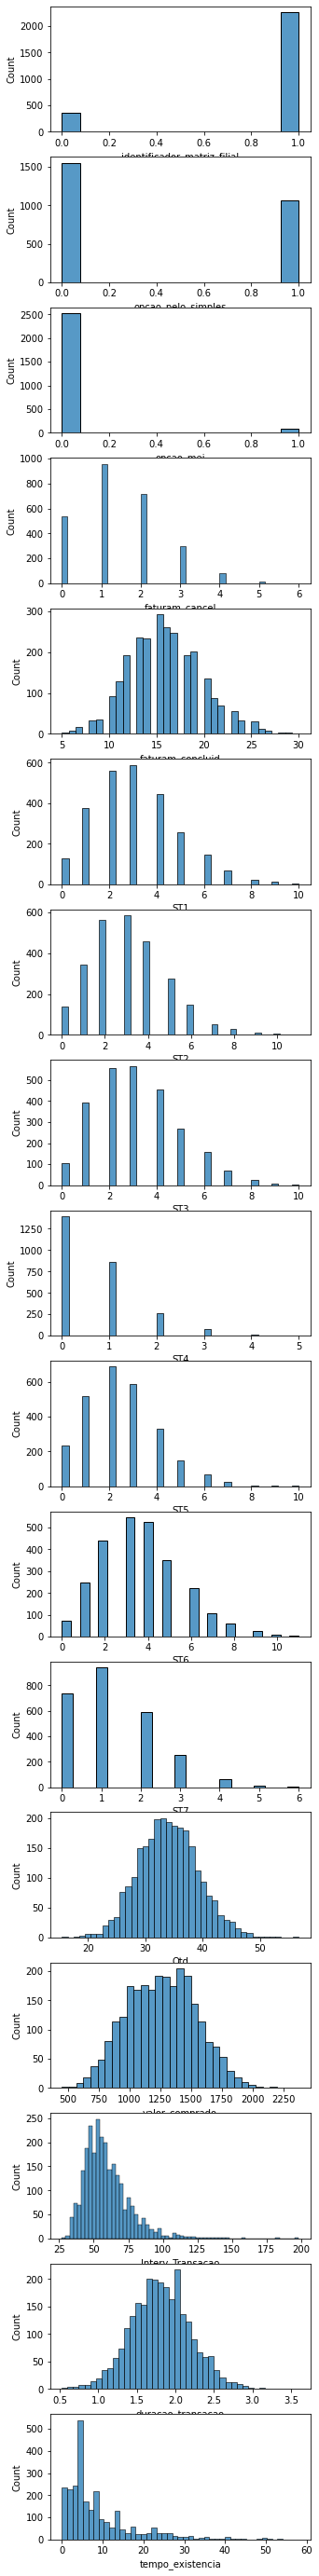

In [9]:
#Observando a distribuição e ordem de grandeza das variáveis.

f, ax = plt.subplots(17, figsize=(5,50))
sns.histplot(x=enriquecimento_clean['identificador_matriz_filial'], ax=ax[0])
sns.histplot(x=enriquecimento_clean['opcao_pelo_simples'], ax=ax[1])
sns.histplot(x=enriquecimento_clean['opcao_mei'], ax=ax[2])
sns.histplot(x=enriquecimento_clean['faturam_cancel'], ax=ax[3])
sns.histplot(x=enriquecimento_clean['faturam_concluid'], ax=ax[4])
sns.histplot(x=enriquecimento_clean['ST1'], ax=ax[5])
sns.histplot(x=enriquecimento_clean['ST2'], ax=ax[6])
sns.histplot(x=enriquecimento_clean['ST3'], ax=ax[7])
sns.histplot(x=enriquecimento_clean['ST4'], ax=ax[8])
sns.histplot(x=enriquecimento_clean['ST5'], ax=ax[9])
sns.histplot(x=enriquecimento_clean['ST6'], ax=ax[10])
sns.histplot(x=enriquecimento_clean['ST7'], ax=ax[11])
sns.histplot(x=enriquecimento_clean['Qtd'], ax=ax[12])
sns.histplot(x=enriquecimento_clean['valor_comprado'], ax=ax[13])
sns.histplot(x=enriquecimento_clean['Interv_Transacao'], ax=ax[14])
sns.histplot(x=enriquecimento_clean['duracao_transacao'], ax=ax[15])
sns.histplot(x=enriquecimento_clean['tempo_existencia'], ax=ax[16])


# Normalização dos Dados (3 Testes de REESCALA)

## Método:MinMaxScaler (Testado e Não escolhido)

In [ ]:
#MinMaxScaler
X_MinMax = enriquecimento_clean.copy()
X_MinMax[['faturam_cancel','faturam_(Testado e Não escolhido)concluid','ST1','ST2','ST3','ST4','ST5','ST6','ST7','Qtd','valor_comprado','Interv_Transacao','duracao_transacao','tempo_existencia']] =MinMaxScaler().fit_transform(enriquecimento_clean[['faturam_cancel','faturam_concluid','ST1','ST2','ST3','ST4','ST5','ST6','ST7','Qtd','valor_comprado','Interv_Transacao','duracao_transacao','tempo_existencia']])

In [ ]:
ax = sns.heatmap(X_MinMax.corr(),xticklabels=X_MinMax.columns, yticklabels=X_MinMax.columns,  linewidths=0.8, cmap="YlGnBu")

In [ ]:
#Dados após reescalados
f, ax = plt.subplots(14, figsize=(5,50))
sns.histplot(x=X_MinMax['faturam_cancel'], ax=ax[0])
sns.histplot(x=X_MinMax['faturam_concluid'], ax=ax[1])
sns.histplot(x=X_MinMax['ST1'], ax=ax[2])
sns.histplot(x=X_MinMax['ST2'], ax=ax[3])
sns.histplot(x=X_MinMax['ST3'], ax=ax[4])
sns.histplot(x=X_MinMax['ST4'], ax=ax[5])
sns.histplot(x=X_MinMax['ST5'], ax=ax[6])
sns.histplot(x=X_MinMax['ST6'], ax=ax[7])
sns.histplot(x=X_MinMax['ST7'], ax=ax[8])
sns.histplot(x=X_MinMax['Qtd'], ax=ax[9])
sns.histplot(x=X_MinMax['valor_comprado'], ax=ax[10])
sns.histplot(x=X_MinMax['Interv_Transacao'], ax=ax[11])
sns.histplot(x=X_MinMax['duracao_transacao'], ax=ax[12])
sns.histplot(x=X_MinMax['tempo_existencia'], ax=ax[13])

## Método: Normalizer (Testado e Não escolhido)

In [ ]:
#Normalizer
X_normalize = enriquecimento_clean.copy()
X_normalize[['faturam_cancel','faturam_concluid','ST1','ST2','ST3','ST4','ST5','ST6','ST7','Qtd','valor_comprado','Interv_Transacao','duracao_transacao','tempo_existencia']] =Normalizer().fit_transform(enriquecimento_clean[['faturam_cancel','faturam_concluid','ST1','ST2','ST3','ST4','ST5','ST6','ST7','Qtd','valor_comprado','Interv_Transacao','duracao_transacao','tempo_existencia']])

In [ ]:
sns.heatmap(X_normalize.corr(),xticklabels=X_normalize.columns, yticklabels=X_normalize.columns,  linewidths=0.8, cmap="YlGnBu")

In [ ]:
#Dados após reescalados
f, ax = plt.subplots(14, figsize=(5,50))

sns.histplot(x=X_normalize['faturam_cancel'], ax=ax[0])
sns.histplot(x=X_normalize['faturam_concluid'], ax=ax[1])
sns.histplot(x=X_normalize['ST1'], ax=ax[2])
sns.histplot(x=X_normalize['ST2'], ax=ax[3])
sns.histplot(x=X_normalize['ST3'], ax=ax[4])
sns.histplot(x=X_normalize['ST4'], ax=ax[5])
sns.histplot(x=X_normalize['ST5'], ax=ax[6])
sns.histplot(x=X_normalize['ST6'], ax=ax[7])
sns.histplot(x=X_normalize['ST7'], ax=ax[8])
sns.histplot(x=X_normalize['Qtd'], ax=ax[9])
sns.histplot(x=X_normalize['valor_comprado'], ax=ax[10])
sns.histplot(x=X_normalize['Interv_Transacao'], ax=ax[11])
sns.histplot(x=X_normalize['duracao_transacao'], ax=ax[12])
sns.histplot(x=X_normalize['tempo_existencia'], ax=ax[13])

## Método: StandardScaler (ESCOLHIDO)

In [10]:
#StandardScaler
X_standard = enriquecimento_clean.copy()
X_standard[['faturam_cancel','faturam_concluid','ST1','ST2','ST3','ST4','ST5','ST6','ST7','Qtd','valor_comprado','Interv_Transacao','duracao_transacao','tempo_existencia']] = StandardScaler().fit_transform(enriquecimento_clean[['faturam_cancel','faturam_concluid','ST1','ST2','ST3','ST4','ST5','ST6','ST7','Qtd','valor_comprado','Interv_Transacao','duracao_transacao','tempo_existencia']])

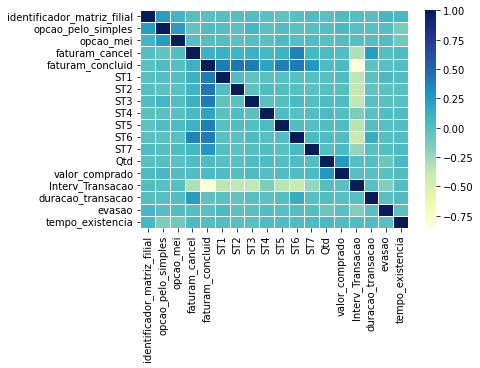

In [11]:
ax = sns.heatmap(X_standard.corr(),xticklabels=X_standard.columns, yticklabels=X_standard.columns,  linewidths=0.8, cmap="YlGnBu")

<AxesSubplot:xlabel='tempo_existencia', ylabel='Count'>

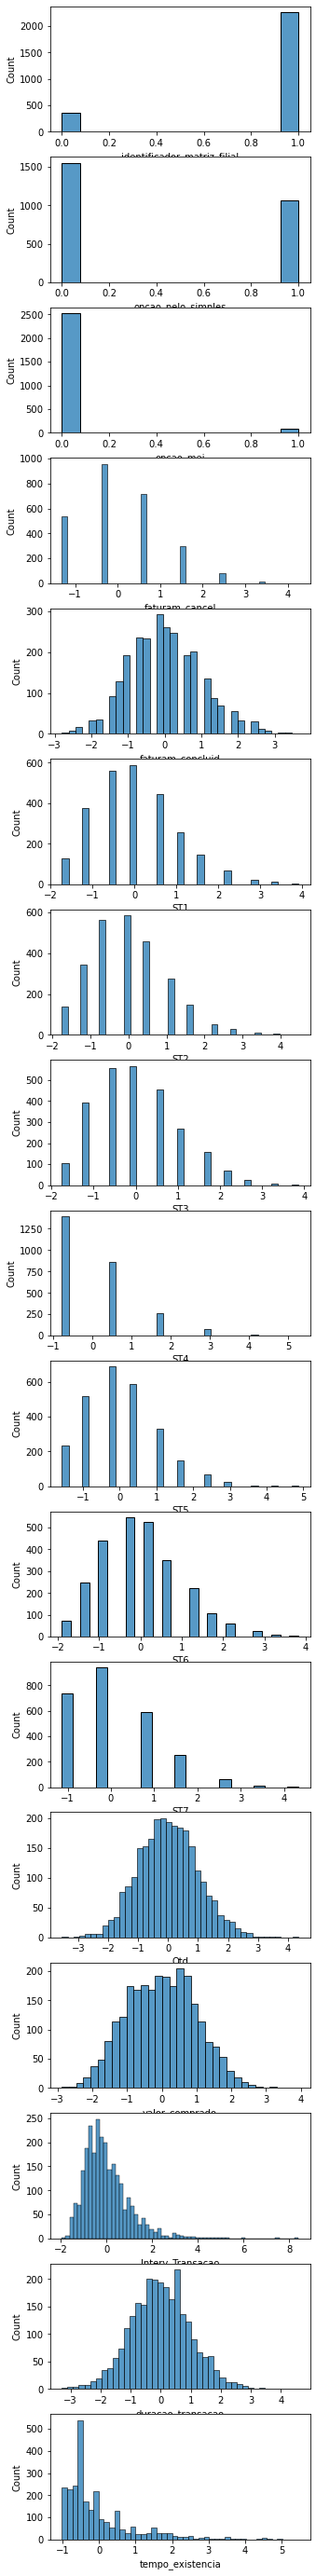

In [12]:
#Dados após reescalados

f, ax = plt.subplots(17, figsize=(5,50))
sns.histplot(x=X_standard['identificador_matriz_filial'], ax=ax[0])
sns.histplot(x=X_standard['opcao_pelo_simples'], ax=ax[1])
sns.histplot(x=X_standard['opcao_mei'], ax=ax[2])
sns.histplot(x=X_standard['faturam_cancel'], ax=ax[3])
sns.histplot(x=X_standard['faturam_concluid'], ax=ax[4])
sns.histplot(x=X_standard['ST1'], ax=ax[5])
sns.histplot(x=X_standard['ST2'], ax=ax[6])
sns.histplot(x=X_standard['ST3'], ax=ax[7])
sns.histplot(x=X_standard['ST4'], ax=ax[8])
sns.histplot(x=X_standard['ST5'], ax=ax[9])
sns.histplot(x=X_standard['ST6'], ax=ax[10])
sns.histplot(x=X_standard['ST7'], ax=ax[11])
sns.histplot(x=X_standard['Qtd'], ax=ax[12])
sns.histplot(x=X_standard['valor_comprado'], ax=ax[13])
sns.histplot(x=X_standard['Interv_Transacao'], ax=ax[14])
sns.histplot(x=X_standard['duracao_transacao'], ax=ax[15])
sns.histplot(x=X_standard['tempo_existencia'], ax=ax[16])

In [13]:
# Realizando uma cópia do dataset produzido.
enriquecimento_reescale = X_standard.copy()
enriquecimento_reescale.describe().round()

,identificador_matriz_filial,opcao_pelo_simples,opcao_mei,faturam_cancel,faturam_concluid,ST1,ST2,ST3,ST4,ST5,ST6,ST7,Qtd,valor_comprado,Interv_Transacao,duracao_transacao,evasao,tempo_existencia
count,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0
mean,1.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
std,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
min,0.0,0.0,0.0,-1.0,-3.0,-2.0,-2.0,-2.0,-1.0,-2.0,-2.0,-1.0,-4.0,-3.0,-2.0,-3.0,0.0,-1.0
25%,1.0,0.0,0.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0
50%,1.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-1.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
75%,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
max,1.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,8.0,5.0,1.0,5.0


## IDENTIFICANDO O DESBALANCEAMENTO DOS DADOS

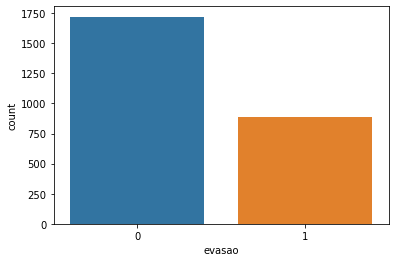

In [14]:
#Identificando o desbalanceamento da classe evasão. Note que isto pode provocar que o modelo seja tendencioso a classificar clientes como não evadidos.
sns.countplot(x=enriquecimento_reescale['evasao'],
              data=enriquecimento_reescale);

In [15]:
enriquecimento_reescale['evasao'].value_counts(0)

0    1721
1     888
Name: evasao, dtype: int64

## TESTES SIMPLES DE MODELO SEM APLICAÇÃO DE BALANCEAMENTO NOS DADOS:

## Preparação

In [16]:
#Separando as features de análise
X = enriquecimento_reescale.drop(['evasao'], axis=1)
#Separando o que gostariamos de prever
y = enriquecimento_reescale['evasao']

#Separação da amostras de treino e amostra de teste através do comnando train_tests_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

np.bincount(y)

array([1721,  888], dtype=int64)

## Modelo LogisticRegression

In [17]:
#Seleção do modelo de classificação
model_teste = LogisticRegression(solver='liblinear')

#Treinamento do algoritimo de regressão. Ajuste do modelo aos dados.
model_teste.fit(X_train, y_train)

#Score do modelo nos dados de teste
result = model_teste.score(X_test, y_test)
print('Acurácia nos Dados de Teste: %.3f%%' % (result * 100.0))

#Colocando as classificações na variável y_pred
y_predict = model_teste.predict(X_test)

Acurácia nos Dados de Teste: 74.457%


In [18]:
#Identificando que as condições de desbalanceamento está enviesando o modelo.
labels=['Não evadidos','evadidos']
print(classification_report(y_test,y_predict,target_names=labels))

              precision    recall  f1-score   support

Não evadidos       0.74      0.93      0.82       506
    evadidos       0.75      0.41      0.53       277

    accuracy                           0.74       783
   macro avg       0.75      0.67      0.68       783
weighted avg       0.75      0.74      0.72       783



In [19]:
#Matriz de confusão. Repare que a classe 1, aquela desbalanceada, teve um pior resultado.
print(pd.crosstab(y_test,y_predict, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1  All
Real                  
0        469   37  506
1        163  114  277
All      632  151  783


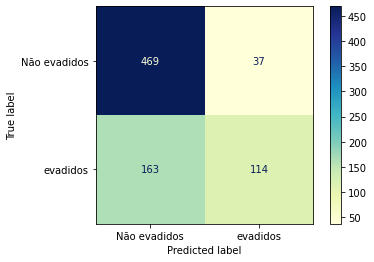

In [20]:
#Matriz de confusão. Repare que a classe 1, aquela desbalanceada, teve um pior resultado.
cm=confusion_matrix(y_test,y_predict)
labels=['Não evadidos','evadidos']
cmd=ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d',cmap='YlGnBu')
plt.show()

In [21]:
actual_vs_predict = pd.DataFrame({'Actual':(y_test.values).flatten(),
                                  'Prediction': y_predict.flatten()})

print(actual_vs_predict.sample(8))

     Actual  Prediction
372       0           0
769       0           1
349       0           0
506       1           0
751       1           0
382       1           0
571       1           0
568       0           0


ROC AUC: 66.92 %


Text(0, 0.5, 'True Positive Rate')

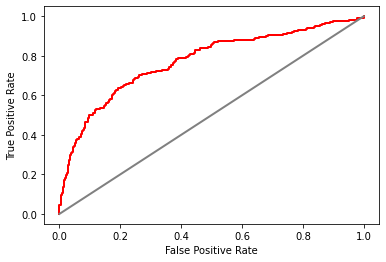

In [22]:
print('ROC AUC: %.2f' % (roc_auc_score(y_test,y_predict)*100), '%')

y_probs = model_teste.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw=2, color='red')
plt.plot([0,1],[0,1], lw=2, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## BALANCEAMENTO (2 modelos testados)

### SMOTEENN (Testado mas não escolhido)

In [ ]:
#Infelizmente este método não apresentou bom resultado;

smoteenn = SMOTEENN()

X, y = smoteenn.fit_resample(X, y)
np.bincount(y)

### SMOTE (Escolhido)

In [23]:
X = enriquecimento_reescale.drop(['evasao'], axis=1)
y = enriquecimento_reescale['evasao']

print('Qtd original de não evasão : ', sum(y==0))
print('Qtd original de evasão: ', sum(y==1))
print('----------------------')

#Balanceamento
smt = SMOTE()

X, y = smt.fit_resample(X, y)

print('Qtd balanceada de não evasão: ', sum(y==0))
print('Qtd balanceada de evasão: ', sum(y==1))

Qtd original de não evasão :  1721
Qtd original de evasão:  888
----------------------
Qtd balanceada de não evasão:  1721
Qtd balanceada de evasão:  1721


In [24]:
#Separação da amostras de treino e amostra de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('Número de registros para treinar o modelo: ', X_train.shape)
print('Número de registros para avaliar/testar o desempenho do modelo: ', X_test.shape)
print('Número de predições conhecidas para treinar o modelo: ', y_train.shape)
print('Número de predições conhecidas para avaliar/testar o desempenho do modelo: ', y_test.shape)

Número de registros para treinar o modelo:  (2409, 17)
Número de registros para avaliar/testar o desempenho do modelo:  (1033, 17)
Número de predições conhecidas para treinar o modelo:  (2409,)
Número de predições conhecidas para avaliar/testar o desempenho do modelo:  (1033,)


## TESTE DE MODELO AGORA COM OS DADOS BALANCEADOS:

### Modelo LogisticRegression

In [25]:
#Seleção do modelo de classificação
model_balanc = LogisticRegression(solver='liblinear')

#Treinamento do algoritimo de regressão
model_balanc.fit(X_train, y_train)

#Score do modelo nos dados de teste
result = model_balanc.score(X_test, y_test)
print('Acurácia nos Dados de Teste: %.3f%%' % (result * 100.0))

#Colocando as classificações na variável y_pred
y_predict = model_balanc.predict(X_test)

Acurácia nos Dados de Teste: 72.701%


In [26]:
#Identificando que as condições de desbalanceamento NÃO está enviesando o modelo.
print(classification_report(y_test,y_predict ))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       511
           1       0.74      0.71      0.72       522

    accuracy                           0.73      1033
   macro avg       0.73      0.73      0.73      1033
weighted avg       0.73      0.73      0.73      1033



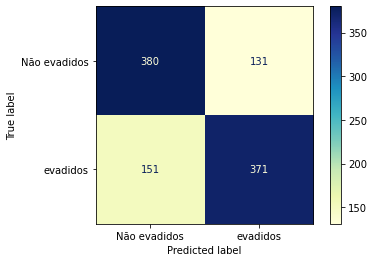

In [27]:
#Matriz de confusão. Repare que a classe 1, aquela que antes estava desbalanceada, agora não teve um pior resultado.
cm=confusion_matrix(y_test,y_predict)
labels=['Não evadidos','evadidos']
cmd=ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d',cmap='YlGnBu')
plt.show()

In [28]:
actual_vs_predict = pd.DataFrame({'Actual':(y_test.values).flatten(),
                                  'Prediction': y_predict.flatten()})

print(actual_vs_predict.sample(8))

     Actual  Prediction
232       0           0
58        0           0
779       1           1
268       0           0
585       0           0
371       0           0
656       1           0
337       0           0


ROC AUC: 72.72 %


Text(0, 0.5, 'True Positive Rate')

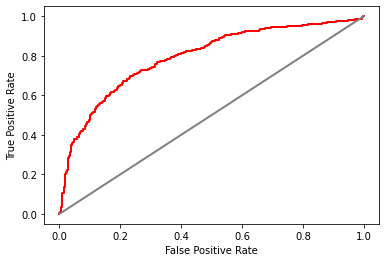

In [29]:
print('ROC AUC: %.2f' % (roc_auc_score(y_test,y_predict)*100), '%')

y_probs = model_balanc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw=2, color='red')
plt.plot([0,1],[0,1], lw=2, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# VALIDAÇÃO CRUZADA

## 1º MODELO: Modelo LogisticRegression

## Descobrindo os melhores hiperparâmetros

In [30]:
#Hiperparâmetros que serão testados

logistic=LogisticRegression()

#Hiperparâmetros testados:
penalty = ['none', 'l1', 'l2']
random_state = [0, 42]
solver= ['liblinear', 'saga']

param_grid_logistic = dict(penalty=penalty,
                           random_state=random_state,
                           solver=solver)

#GridSearchCV para realizar as diversas combinações entre os hiperparâmetros:
grid_logistic = GridSearchCV(estimator=logistic, param_grid=param_grid_logistic, scoring='recall', verbose=1, n_jobs=-1 )

#Treinamento do algoritimo de regressão
grid_logistic.fit(X_train, y_train)

print('Melhor recall: ', grid_logistic.best_score_)
print('Melhores parâmetros: ', grid_logistic.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhor recall:  0.7480997210599721
Melhores parâmetros:  {'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}


## Aplicando o Cross-Validation com o modelo já configurado com os melhores hiperparâmetros

In [31]:
n_splits = [3, 6, 9, 12]
SEED=42

list_mean_log=[]

for item_logistic in n_splits:
    np.random.seed(SEED)  
#separando os dados de teste em k folds;
#E quando passado para o parametro cv e cross_val_score ele mistura os folds e elimina quaquer influencia da disposição dos dados.
    cv = KFold(n_splits=item_logistic, shuffle=True, random_state=SEED)
    
    #Criação da maquina preditiva
    logistic = LogisticRegression(penalty= dict(grid_logistic.best_params_)['penalty'],
                                random_state= dict(grid_logistic.best_params_)['random_state'],
                                solver= dict(grid_logistic.best_params_)['solver'])
    
    
        
    results_logistic = cross_val_score(logistic, X_train, y_train, cv = cv,
                              scoring = 'recall')
    mean_logistic = results_logistic.mean()
    dv_logistic = results_logistic.std()
    
    print('Recall médio - n_splits {}: {:.2f}%'
          .format(item_logistic, mean_logistic*100))
    print('Intervalo de Recall - n_splits {}: [{:.2f}% ~ {:.2f}%]\n'
          .format(item_logistic, (mean_logistic - 2*dv_logistic)*100, (mean_logistic + 2*dv_logistic)*100))
    
    list_mean_log.append(round(mean_logistic*100,2))

Recall médio - n_splits 3: 73.58%
Intervalo de Recall - n_splits 3: [68.87% ~ 78.29%]

Recall médio - n_splits 6: 74.45%
Intervalo de Recall - n_splits 6: [69.28% ~ 79.62%]

Recall médio - n_splits 9: 74.42%
Intervalo de Recall - n_splits 9: [68.90% ~ 79.94%]

Recall médio - n_splits 12: 74.22%
Intervalo de Recall - n_splits 12: [64.91% ~ 83.53%]



In [32]:
print('Metrica de Recall nos k-folds: \n',list_mean_log,'\n')
print('Média das métricas de Recall nos k-folds: \n', np.mean(list_mean_log),'\n')
print('Desvio Padrão das métricas de Recall nos k-folds: \n', np.std(list_mean_log),'\n')

Metrica de Recall nos k-folds: 
 [73.58, 74.45, 74.42, 74.22] 

Média das métricas de Recall nos k-folds: 
 74.16749999999999 

Desvio Padrão das métricas de Recall nos k-folds: 
 0.35052638987671253 



## 2º MODELO:DecisionTreeClassifier

## Descobrindo os melhores hiperparâmetros

In [33]:
model_DecTree = DecisionTreeClassifier()

max_depth = [5, 6, 7, 8, 9, 10]
splitter=['best', 'random']
random_state = [0, 42]

param_grid = dict(max_depth=max_depth,
                  splitter=splitter,
                  random_state=random_state)

grid_DecTree = GridSearchCV(estimator=model_DecTree, param_grid=param_grid, scoring='recall', verbose=1, n_jobs=-1 )

grid_DecTree.fit(X_train, y_train)

print('Melhor recalle: ', grid_DecTree.best_score_,'\n')
print('Melhores Params: ', grid_DecTree.best_params_,'\n')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhor recalle:  0.7322663877266388 

Melhores Params:  {'max_depth': 7, 'random_state': 0, 'splitter': 'best'} 



## Aplicando o Cross-Validation com o modelo configurado com os melhores hiperparâmetros

In [34]:
n_splits = [3, 6, 9, 12]
SEED = 42

list_mean_Tree=[]

for item_DecTree in n_splits:
    np.random.seed(SEED)  
#separando os dados de teste em k folds;
#E quando passado para o parametro cv e cross_val_score ele mistura os folds e elimina quaquer influencia da disposição dos dados.
    cv = KFold(n_splits=item_DecTree, shuffle=True, random_state=SEED)
    
    #Criação da maquina preditiva
    model_DecTree = DecisionTreeClassifier(max_depth=dict(grid_DecTree.best_params_)['max_depth'],
                                           splitter=dict(grid_DecTree.best_params_)['splitter'],
                                           random_state=dict(grid_DecTree.best_params_)['random_state'])    
        
                              
    results_DecTree = cross_val_score(model_DecTree, X_train, y_train, cv = cv,
                              scoring = 'accuracy')
    mean_DecTree = results_DecTree.mean()
    dv_DecTree = results_DecTree.std()
    print('Recall média - n_splits {}: {:.2f}%'
          .format(item_DecTree, mean_DecTree*100))
    print('Intervalo de recall - n_splits {}: [{:.2f}% ~ {:.2f}%]\n'
          .format(item_DecTree, (mean_DecTree - 2*dv_DecTree)*100, (mean_DecTree + 2*dv_DecTree)*100))
    
    list_mean_Tree.append(round(mean_DecTree*100,2))

Recall média - n_splits 3: 70.15%
Intervalo de recall - n_splits 3: [69.33% ~ 70.98%]

Recall média - n_splits 6: 72.40%
Intervalo de recall - n_splits 6: [68.82% ~ 75.97%]

Recall média - n_splits 9: 71.81%
Intervalo de recall - n_splits 9: [68.71% ~ 74.92%]

Recall média - n_splits 12: 71.28%
Intervalo de recall - n_splits 12: [66.26% ~ 76.29%]



In [35]:
print('Metrica de Recall nos k-folds: \n',list_mean_Tree,'\n')
print('Média das métricas de Recall nos k-folds: \n', np.mean(list_mean_Tree),'\n')
print('Desvio Padrão das métricas de Recall nos k-folds: \n', np.std(list_mean_Tree),'\n')

Metrica de Recall nos k-folds: 
 [70.15, 72.4, 71.81, 71.28] 

Média das métricas de Recall nos k-folds: 
 71.41 

Desvio Padrão das métricas de Recall nos k-folds: 
 0.828341716926052 



## 3º MODELO: Modelo XGBoost

In [36]:
model_xgb = XGBClassifier()

max_depth = [5, 7, 9, 10]
n_estimators= [200, 900, 1000]
objective=['reg:logistic','binary:logistic']

param_grid = dict(max_depth=max_depth,
                  n_estimators=n_estimators,
                  objective=objective)

grid_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='recall', verbose=1, n_jobs=-1 )

grid_xgb.fit(X_train, y_train)

print('Melhor recall: ', grid_xgb.best_score_,'\n')
print('Melhores hiperparâmetros: ', grid_xgb.best_params_,'\n')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhor recall:  0.8048291492329149 

Melhores hiperparâmetros:  {'max_depth': 9, 'n_estimators': 900, 'objective': 'reg:logistic'} 



In [37]:
n_splits = [3, 6, 9, 12]
SEED = 42

list_mean_xgb=[]

for item_xgb in n_splits:
    np.random.seed(SEED)  
#separando os dados de teste em k folds;
#E quando passado para o parametro cv e cross_val_score ele mistura os folds e elimina quaquer influencia da disposição dos dados.
    cv = KFold(n_splits=item_xgb, shuffle=True, random_state=SEED)
    
    #Criação da maquina preditiva
    model_xgb = XGBClassifier(max_depth=dict(grid_xgb.best_params_)['max_depth'],
                              n_estimators=dict(grid_xgb.best_params_)['n_estimators'],
                              objective=dict(grid_xgb.best_params_)['objective'])
        
                              
    results_xgb = cross_val_score(model_xgb, X_train, y_train, cv = cv,
                              scoring = 'recall')
    
    mean_xgb = results_xgb.mean()
    dv_xgb = results_xgb.std()
    print('Recall média - n_splits {}: {:.2f}%'
          .format(item_xgb, mean_xgb*100))
    print('Intervalo de recall - n_splits {}: [{:.2f}% ~ {:.2f}%]\n'
          .format(item_xgb, (mean_xgb - 2*dv_xgb)*100, (mean_xgb + 2*dv_xgb)*100))
    
    list_mean_xgb.append(round(mean_xgb*100,2))

Recall média - n_splits 3: 78.32%
Intervalo de recall - n_splits 3: [77.62% ~ 79.03%]

Recall média - n_splits 6: 79.06%
Intervalo de recall - n_splits 6: [75.54% ~ 82.59%]

Recall média - n_splits 9: 78.87%
Intervalo de recall - n_splits 9: [75.69% ~ 82.06%]

Recall média - n_splits 12: 78.97%
Intervalo de recall - n_splits 12: [72.16% ~ 85.78%]



In [38]:
print('Metrica de Recall nos k-folds: \n',list_mean_xgb,'\n')
print('Média das métricas de Recall nos k-folds: \n', np.mean(list_mean_xgb),'\n')
print('Desvio Padrão das métricas de Recall nos k-folds: \n', np.std(list_mean_xgb),'\n')

Metrica de Recall nos k-folds: 
 [78.32, 79.06, 78.87, 78.97] 

Média das métricas de Recall nos k-folds: 
 78.805 

Desvio Padrão das métricas de Recall nos k-folds: 
 0.2879670119996421 



# Conclusão:
## Resumo dos três modelos 

In [39]:
n_splits = [3, 6, 9]
SEED = 42

for item_cv in n_splits:
    np.random.seed(SEED)
    cv = KFold(n_splits = item_cv, shuffle = True, random_state=SEED)
    
    models_cv = [logistic, model_DecTree, model_xgb]
    name_cv = ['Regressão Logística','Árvore de Decisão', 'Modelo XGB']
    count = 0
    
    for item_m in models_cv:
        np.random.seed(SEED)
        results = cross_val_score(item_m, X_train, y_train, cv = cv, scoring = 'recall')
        
        mean = results.mean()
        dv = results.std()
       
        print('Para K folds igual a: ',item_cv)
        print('Recall média - Modelo {}: {:.2f}%'.format(name_cv[count], mean*100))
        print('Intervalo de recall - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'.format(name_cv[count], (mean - 2*dv)*100, (mean + 2*dv)*100))
        count += 1
    print('- - - - - - - - - - -\n')

Para K folds igual a:  3
Recall média - Modelo Regressão Logística: 73.58%
Intervalo de recall - Modelo Regressão Logística: [68.87% ~ 78.29%]

Para K folds igual a:  3
Recall média - Modelo Árvore de Decisão: 69.16%
Intervalo de recall - Modelo Árvore de Decisão: [60.57% ~ 77.75%]

Para K folds igual a:  3
Recall média - Modelo Modelo XGB: 78.32%
Intervalo de recall - Modelo Modelo XGB: [77.62% ~ 79.03%]

- - - - - - - - - - -

Para K folds igual a:  6
Recall média - Modelo Regressão Logística: 74.45%
Intervalo de recall - Modelo Regressão Logística: [69.28% ~ 79.62%]

Para K folds igual a:  6
Recall média - Modelo Árvore de Decisão: 74.90%
Intervalo de recall - Modelo Árvore de Decisão: [67.58% ~ 82.22%]

Para K folds igual a:  6
Recall média - Modelo Modelo XGB: 79.06%
Intervalo de recall - Modelo Modelo XGB: [75.54% ~ 82.59%]

- - - - - - - - - - -

Para K folds igual a:  9
Recall média - Modelo Regressão Logística: 74.42%
Intervalo de recall - Modelo Regressão Logística: [68.90% ~

## O modelo que apresentou o melhor Recall e a maior capacidade de generalização foi o Modelo 3: XGBoost

# Analisando a importância de cada variável

In [40]:
best_model_xgb = XGBClassifier(max_depth=dict(grid_xgb.best_params_)['max_depth'],
                          n_estimators=dict(grid_xgb.best_params_)['n_estimators'],
                          objective=dict(grid_xgb.best_params_)['objective'])

best_model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=900, n_jobs=4,
              num_parallel_tree=1, objective='reg:logistic', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [41]:
#Score do modelo nos dados de teste: Comparando o valor que ele previu com o valor que era esperado no conjunto de teste.
result = best_model_xgb.score(X_test, y_test)
print('Acurácia nos Dados de Teste: %.3f%%' % (result * 100.0))

Acurácia nos Dados de Teste: 80.639%


In [42]:
#Colocando as classificações na variável y_pred

y_predict = best_model_xgb.predict(X_test)
actual_vs_predict = pd.DataFrame({'Actual':((y_test).values).flatten(),
                                  'Prediction': y_predict.flatten()})

print(actual_vs_predict.sample(10))

     Actual  Prediction
294       0           0
453       1           1
636       0           0
139       1           1
538       0           0
365       0           0
603       1           1
582       1           1
231       1           1
210       1           1


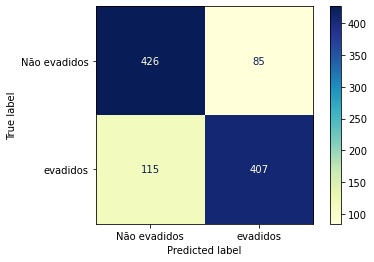

In [43]:
#Matriz de confusão. Repare que a classe 1, aquela que antes estava desbalanceada, agora não teve um pior resultado.
cm=confusion_matrix(y_test,y_predict)
labels=['Não evadidos','evadidos']
cmd=ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d',cmap='YlGnBu')
plt.show()

In [44]:
best_model_xgb.feature_importances_

array([0.08271227, 0.03097558, 0.        , 0.13712177, 0.14660488,
       0.0410274 , 0.05180384, 0.05385505, 0.06079805, 0.0420852 ,
       0.04324376, 0.0526673 , 0.02955591, 0.03407917, 0.11744408,
       0.03103189, 0.04499386], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

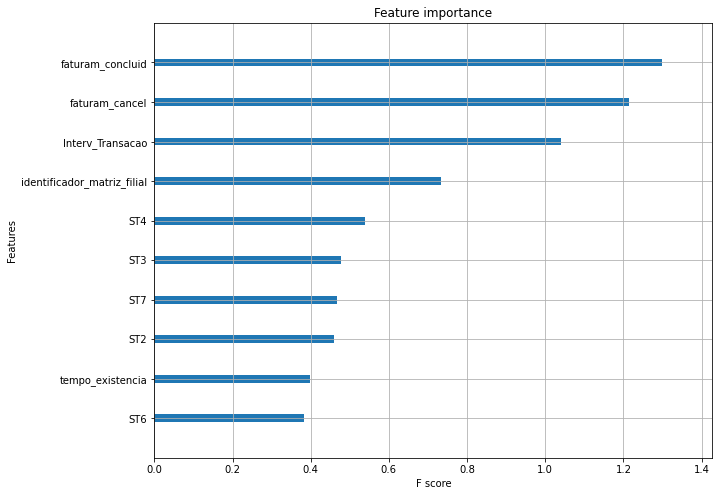

In [45]:
GI = best_model_xgb.feature_importances_
feature_importances = pd.DataFrame(GI, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)


fig, ax = plt.subplots(figsize=(10,8))
plot_importance(best_model_xgb, importance_type='gain', max_num_features=10, show_values=False, ax=ax)

Text(0.5, 1.0, 'Importância de cada feature')

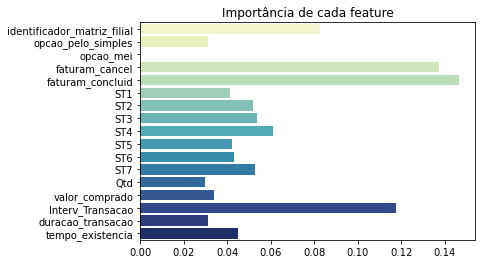

In [46]:
importances = pd.Series(data=best_model_xgb.feature_importances_,
                        index = X.columns)

sns.barplot(x=importances,
            y=importances.index,
            orient='h',
            palette='YlGnBu').set_title('Importância de cada feature')

# RFE

In [47]:
rfe = RFE(best_model_xgb, step=1, n_features_to_select=10)

fit_xgb = rfe.fit(X_train, y_train)

print('Número de features: {}'.format(fit_xgb.n_features_))

cols = fit_xgb.get_support(indices=True)

enriquecimento_reescale.iloc[:,cols]

Número de features: 10


,identificador_matriz_filial,faturam_cancel,faturam_concluid,ST1,ST2,ST3,ST5,ST6,ST7,Interv_Transacao
0,1,-0.386946,-0.740064,-1.167815,-1.181377,0.493413,0.354821,0.176621,-1.134232,0.830916
1,1,1.468829,1.067344,0.524868,-0.617076,-0.627941,0.354821,0.696717,0.687382,-1.228405
2,1,0.540942,0.550941,-0.039360,-0.617076,1.054089,-0.932701,1.216813,1.598189,-0.622722
3,1,-1.314833,-1.772869,-0.039360,-1.181377,-1.188617,-0.932701,-0.863570,-0.223425,1.497166
4,0,1.468829,-0.740064,1.653324,-0.052775,-0.627941,-0.932701,-0.343474,-1.134232,0.406938
...,...,...,...,...,...,...,...,...,...,...
2604,1,1.468829,-0.481863,1.089096,-0.617076,-0.067264,-0.932701,0.696717,-1.134232,0.104097
2605,1,-0.386946,0.292740,0.524868,1.075827,0.493413,-1.576462,-0.863570,0.687382,-0.259313
2606,0,-0.386946,2.616550,1.089096,-0.052775,1.054089,1.642343,1.216813,0.687382,-1.349541
2607,0,-0.386946,-2.031070,-0.603588,-1.745678,-1.188617,-0.288940,-0.863570,0.687382,3.617055


In [75]:
#Seleção das variáveis de entrada
fit_xgb.support_

array([ True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True, False, False])

In [76]:
fit_xgb.ranking_

array([1, 6, 8, 1, 1, 1, 1, 1, 2, 1, 1, 1, 7, 5, 1, 4, 3])

In [89]:
for i in range(X_train.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (X_train.columns[i] , fit_xgb.support_[i], fit_xgb.ranking_[i]))

Column: identificador_matriz_filial, Selected True, Rank: 1.000
Column: opcao_pelo_simples, Selected False, Rank: 6.000
Column: opcao_mei, Selected False, Rank: 8.000
Column: faturam_cancel, Selected True, Rank: 1.000
Column: faturam_concluid, Selected True, Rank: 1.000
Column: ST1, Selected True, Rank: 1.000
Column: ST2, Selected True, Rank: 1.000
Column: ST3, Selected True, Rank: 1.000
Column: ST4, Selected False, Rank: 2.000
Column: ST5, Selected True, Rank: 1.000
Column: ST6, Selected True, Rank: 1.000
Column: ST7, Selected True, Rank: 1.000
Column: Qtd, Selected False, Rank: 7.000
Column: valor_comprado, Selected False, Rank: 5.000
Column: Interv_Transacao, Selected True, Rank: 1.000
Column: duracao_transacao, Selected False, Rank: 4.000
Column: tempo_existencia, Selected False, Rank: 3.000


In [48]:
#Score do modelo nos dados de teste: Comparando o valor que ele previu com o valor que era esperado no conjunto de teste.
result = fit_xgb.score(X_test, y_test)
print('Acurácia nos Dados de Teste: %.3f%%' % (result * 100.0))

Acurácia nos Dados de Teste: 80.252%


In [49]:
#Colocando as classificações na variável y_pred

y_predict = fit_xgb.predict(X_test)
actual_vs_predict = pd.DataFrame({'Actual':((y_test.values).flatten()),
                                  'Prediction': y_predict.flatten()})

print(actual_vs_predict.sample(10))

     Actual  Prediction
925       0           0
289       0           0
757       0           0
29        0           0
529       1           1
807       1           1
109       0           0
698       0           1
679       0           0
51        1           0


In [50]:
#Teste de recall
print(classification_report(y_test,y_predict ))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       511
           1       0.82      0.78      0.80       522

    accuracy                           0.80      1033
   macro avg       0.80      0.80      0.80      1033
weighted avg       0.80      0.80      0.80      1033



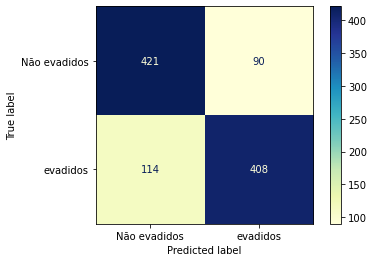

In [51]:
#Matriz de confusão. Repare que a classe 1, aquela que antes estava desbalanceada, agora não teve um pior resultado.
cm=confusion_matrix(y_test,y_predict)
labels=['Não evadidos','evadidos']
cmd=ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d',cmap='YlGnBu')
plt.show()

In [52]:
del y_predict

1º Normalização
2º Balanceamento
3º Seleção dos melhores hiperparâmetros para os modelos 
4º Seleção das melhores Features pelo RFE para dado modelo
5º Comparar se o RFE e o feature_importance_ apresentaram valores iguais para o modelo que se saiu melhor.
6º Testar se o modelo escolhido realmente se saiu melhor com o dataframe só com as features mais importantes


# shap

In [55]:
xgb_full = xgb.DMatrix(X, label=y)
xgb_train = xgb.DMatrix(X_train, label=y_train)

In [56]:
explainer = shap.TreeExplainer(model=best_model_xgb, data=X_train, model_output="predict_proba")#, feature_perturbation="tree_path_dependent")

In [57]:
shap_values_train = explainer.shap_values(X_train)

100%|===================| 2400/2409 [01:41<00:00]        

In [58]:
#O primeiro numero é o tagert
shap_values_train[0][7].sum().round(2)

0.43

In [59]:
shap_values_train[1][7].sum().round(2)

-0.43

In [90]:
shap_values_train

[array([[-3.57316901e-03,  3.79906505e-03, -0.00000000e+00, ...,
          2.67107176e-01, -2.29292623e-02, -1.89457149e-02],
        [-2.02925506e-04,  1.01154018e-02, -0.00000000e+00, ...,
          1.72410782e-01,  7.40175807e-03,  4.75565885e-02],
        [-1.21500959e-03,  2.59236837e-03, -0.00000000e+00, ...,
          4.25583723e-02,  6.86865736e-03,  2.87680465e-03],
        ...,
        [-2.88619867e-03, -5.91440782e-03, -0.00000000e+00, ...,
         -2.71415717e-01, -3.88128403e-02, -6.54676750e-02],
        [ 1.35184633e-02, -1.37420296e-02, -0.00000000e+00, ...,
         -3.55792901e-01, -3.59205019e-02, -2.95634496e-02],
        [-1.46957499e-03, -3.15083341e-03, -0.00000000e+00, ...,
          1.47721001e-01,  3.15778761e-02,  3.46761369e-02]]),
 array([[ 3.57316901e-03, -3.79906505e-03,  0.00000000e+00, ...,
         -2.67107176e-01,  2.29292623e-02,  1.89457149e-02],
        [ 2.02925506e-04, -1.01154018e-02,  0.00000000e+00, ...,
         -1.72410782e-01, -7.40175807e

In [60]:
y_pred_train_proba = best_model_xgb.predict_proba(X_train)

In [132]:
print('Probabilidade do modelo prever negativo - ', (100*y_pred_train_proba[7][0]).round(2),'%.')
print('Probabilidade do modelo prever positivo - ', (100*y_pred_train_proba[7][1]).round(2),'%.')

Probabilidade do modelo prever negativo -  99.43 %.
Probabilidade do modelo prever positivo -  0.57 %.


In [62]:
y_pred_train_proba[7]

array([0.9943432, 0.0056568], dtype=float32)

In [63]:
expected_value = explainer.expected_value

In [64]:
#O modelo tem demonstrado maior confiança em prever a classe negativa
print('valore de base para a classe negativa - ', (100*expected_value[0]).round(2))
print('Valore de base para a classe positiva - ', (100*expected_value[1]).round(2))

valore de base para a classe negativa -  55.96
Valore de base para a classe positiva -  44.04


In [94]:
print('Somatório SHAP para a classe negativa nesta amostra: ',(((100*y_pred_train_proba[7][0]).round(2))-((100*expected_value[0]).round(2))))
print('Somatório SHAP para a classe positiva nesta amostra: ',(((100*y_pred_train_proba[7][1]).round(2))-((100*expected_value[1]).round(2))))

Somatório SHAP para a classe negativa nesta amostra:  43.470000000000006
Somatório SHAP para a classe positiva nesta amostra:  -43.47


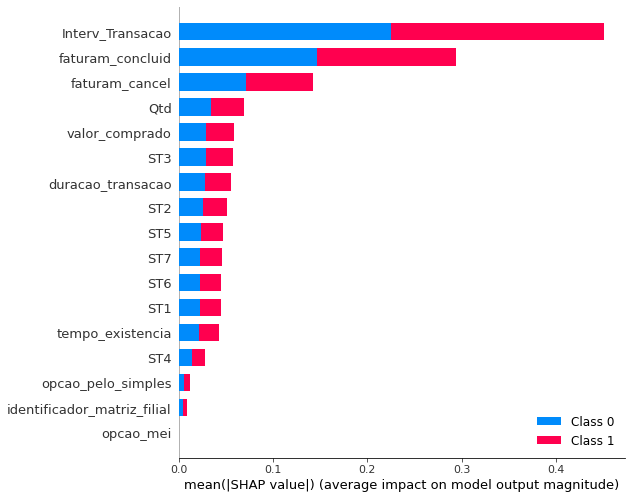

In [69]:
shap.summary_plot(shap_values= shap_values_train, features= X, plot_type='bar')

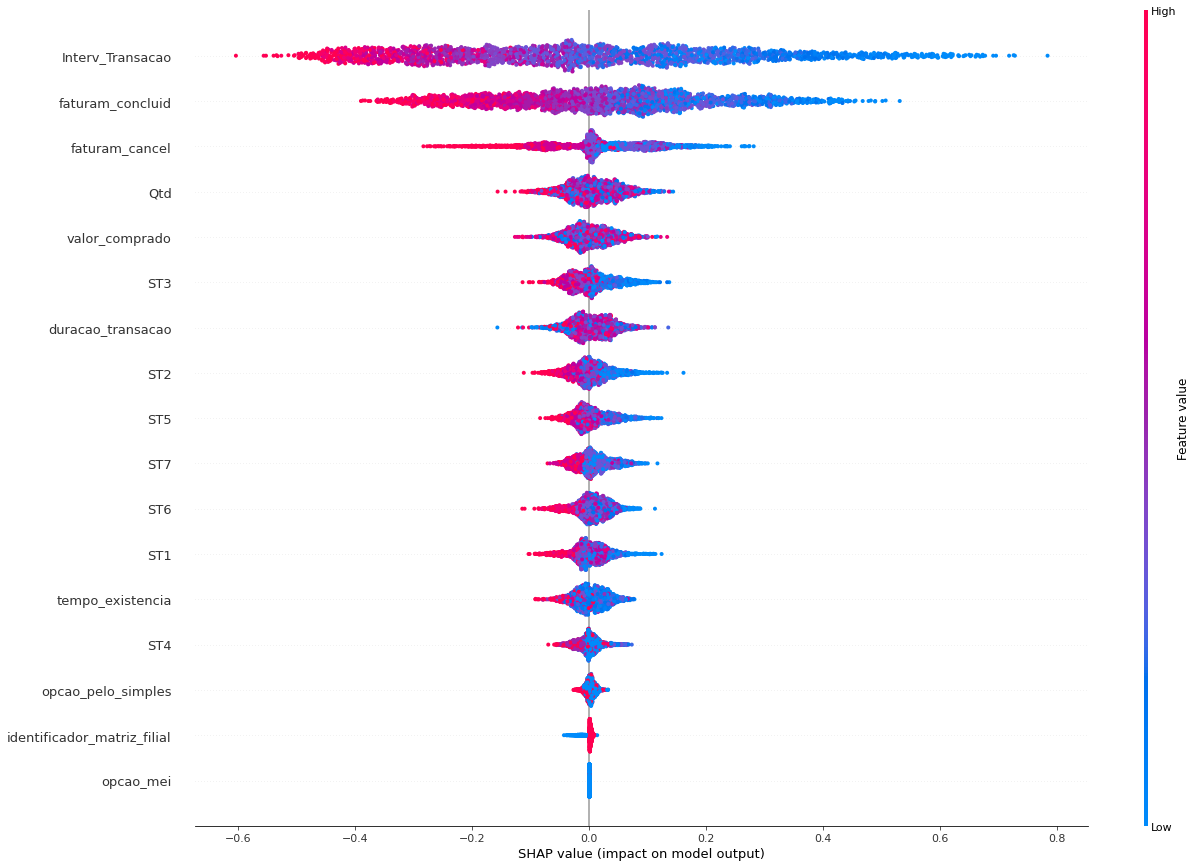

In [134]:
shap.summary_plot(shap_values= shap_values_train[1], features= X_train, plot_type='dot', plot_size=(20,15))

In [108]:
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values_train[1][7],
    feature_names= X_train.columns)

In [74]:
shap.force_plot(
    explainer.expected_value[0],
    shap_values_train[1],
    X_train)

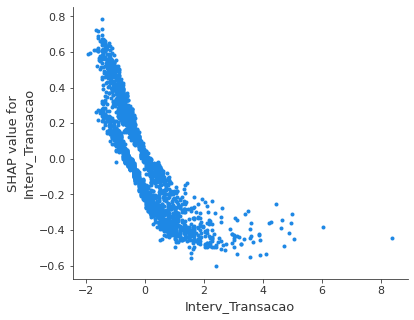

In [113]:
shap.dependence_plot("Interv_Transacao", shap_values_train[1], X_train, interaction_index=None)

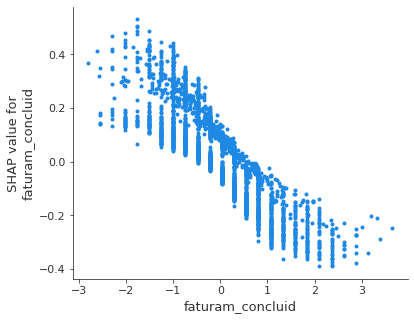

In [114]:
shap.dependence_plot("faturam_concluid", shap_values_train[1], X_train, interaction_index=None)

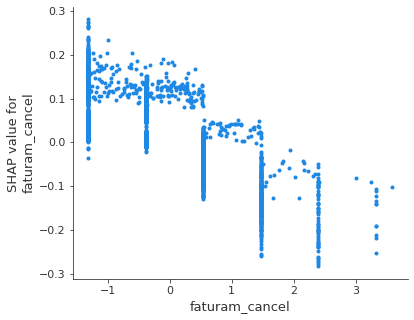

In [115]:
shap.dependence_plot("faturam_cancel", shap_values_train[1], X_train, interaction_index=None)